Fetching data for multiple stocks...


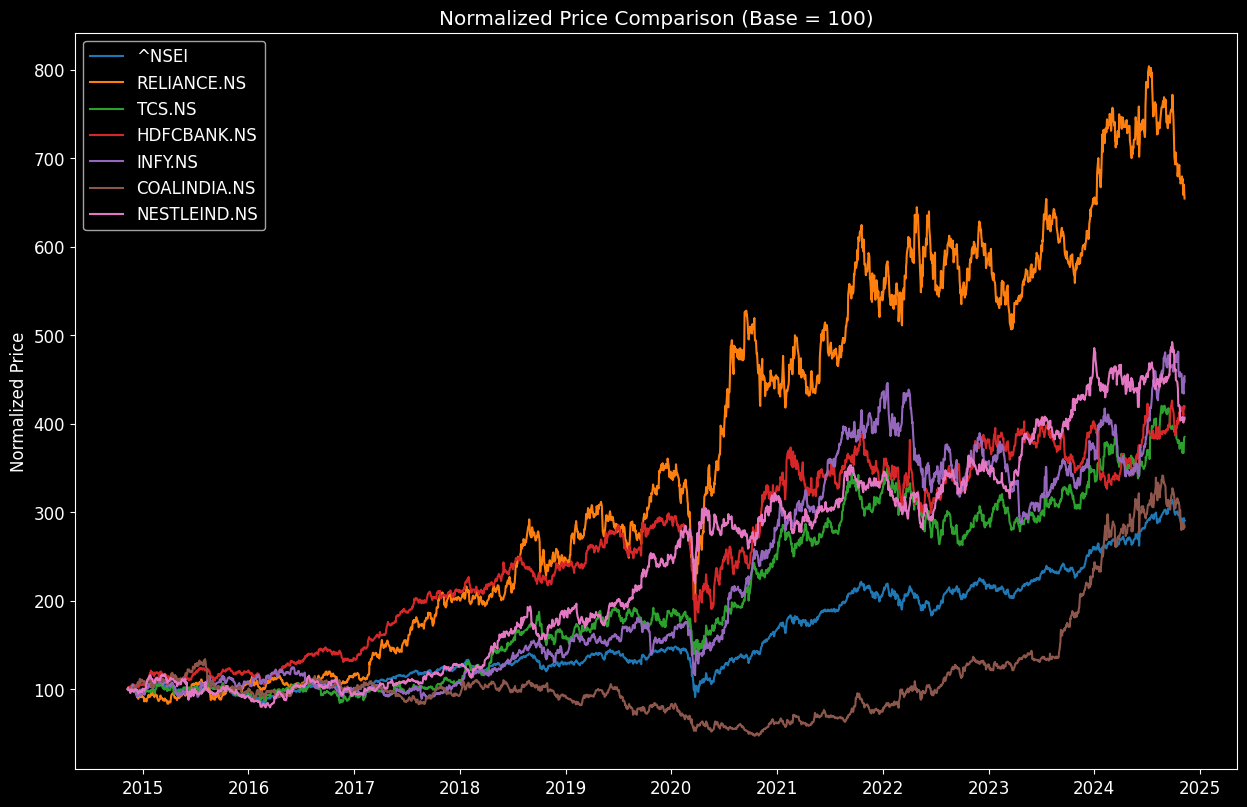

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

class NiftyStockChart:
    def __init__(self):
        plt.style.use('dark_background')
        sns.set_palette("husl")
        plt.rcParams['figure.figsize'] = (15, 10)
        plt.rcParams['font.size'] = 12
        
        # color palette for multiple stocks
        self.colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                      '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        
    def fetch_stock_data(self, symbols, period='10y'):
        """
        Fetch data for multiple stocks
        symbols: List of stock symbols
        period: Time period to fetch data for
        """
        try:
            data_frames = {}
            for symbol in symbols:
                stock = yf.Ticker(symbol)
                df = stock.history(period=period)
                # Normalize prices to 100 at start for fair comparison
                df['Normalized'] = (df['Close'] / df['Close'].iloc[0]) * 100
                data_frames[symbol] = df
            return data_frames
        except Exception as e:
            print(f"Error fetching data: {e}")
            return None

    def plot_comparison(self, data_frames, symbols):
        """Create comprehensive comparison plots"""
        fig = plt.figure(figsize=(15, 20))
        
        ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=2)
        for i, symbol in enumerate(symbols):
            data = data_frames[symbol]
            ax1.plot(data.index, data['Normalized'], 
                    label=symbol, 
                    color=self.colors[i % len(self.colors)])
            
        ax1.set_title('Normalized Price Comparison (Base = 100)')
        ax1.set_ylabel('Normalized Price')
        ax1.legend(loc='upper left')
        return fig

    def compare_stocks(self, symbols):
        """Main function to compare multiple stocks"""
        data_frames = self.fetch_stock_data(symbols)
        if data_frames is None:
            return
        fig = self.plot_comparison(data_frames, symbols) 
        return data_frames, fig

def main():
    # Create analyzer instance
    analyzer = NiftyStockChart()
    
    # Define symbols to compare
    symbols = [
        '^NSEI',          # NIFTY 50
        'RELIANCE.NS',    # Reliance Industries
        'TCS.NS',         # Tata Consultancy Services
        'HDFCBANK.NS',    # HDFC Bank
        'INFY.NS',        # Infosys
        'COALINDIA.NS',   #CoalIndia
        'NESTLEIND.NS'    #NestleIndia
    ]
    
    print("Fetching data for multiple stocks...")
    data_frames, fig = analyzer.compare_stocks(symbols)
    plt.show()
    
if __name__ == "__main__":
    main()